In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
d1 = pd.read_csv('regression/경남_노인일자리수요.csv')
d2 = pd.read_csv('regression/경남65세이상_스트레스및우울감.csv')
d3 = pd.read_csv('regression/경남인구분포.csv')
d4 = pd.read_csv('regression/복지시설_시군별.csv')
y1 = pd.read_csv('regression/등록회원수.csv')

In [3]:
d1.info()
d1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   분류                      18 non-null     object 
 1   지역별 취업희망 노인수            18 non-null     object 
 2   생활비에 보탬이 되기위해 취업희망 노인수  18 non-null     float64
dtypes: float64(1), object(2)
memory usage: 584.0+ bytes


,분류,지역별 취업희망 노인수,생활비에 보탬이 되기위해 취업희망 노인수
0,거제시,"16,251",9539.162661
1,거창군,"10,873",6382.360602
2,고성군,"10,088",5921.452311
3,김해시,"38,525",22614.087540
4,남해군,"10,330",6063.762243
5,밀양시,"18,339",10764.786960
6,사천시,"15,599",9156.604782
7,산청군,"8,041",4720.212576
8,양산시,"29,673",17417.776280
9,의령군,"6,219",3650.489604


In [4]:
d1["지역별 취업희망 노인수"]=pd.to_numeric(d1["지역별 취업희망 노인수"].str.replace(",",""))
d1.head()

,분류,지역별 취업희망 노인수,생활비에 보탬이 되기위해 취업희망 노인수
0,거제시,16251.0,9539.162661
1,거창군,10873.0,6382.360602
2,고성군,10088.0,5921.452311
3,김해시,38525.0,22614.087540
4,남해군,10330.0,6063.762243


In [5]:
del d1['생활비에 보탬이 되기위해 취업희망 노인수']
d1.head()

,분류,지역별 취업희망 노인수
0,거제시,16251.0
1,거창군,10873.0
2,고성군,10088.0
3,김해시,38525.0
4,남해군,10330.0


In [17]:
d1.to_csv('regression/취업희망노인.csv', encoding='utf-8-sig')

In [6]:
d2.info()
d2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구분       18 non-null     object 
 1   스트레스인지율  18 non-null     float64
 2   우울감 경험률  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


,구분,스트레스인지율,우울감 경험률
0,창원시,18.4,4.5
1,진주시,19.6,6.7
2,통영시,17.3,6.9
3,사천시,12.8,13.9
4,김해시,12.6,13.1
5,밀양시,17.7,9.5
6,거제시,7.8,8.0
7,양산시,5.8,7.1
8,의령군,14.3,9.5
9,함안군,11.3,3.5


In [7]:
d3.info()
d3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       19 non-null     object 
 1   popul      19 non-null     object 
 2   popul_old  19 non-null     object 
 3   ratio_old  19 non-null     float64
 4   society    19 non-null     object 
dtypes: float64(1), object(4)
memory usage: 888.0+ bytes


,city,popul,popul_old,ratio_old,society
0,거제시,"240,640","23,863",9.9,고령화사회
1,거창군,"59,132","15,966",27.0,초고령사회
2,고성군,"49,059","14,813",30.2,초고령사회
3,김해시,"522,270","56,571",10.8,고령화사회
4,남해군,"40,990","15,169",37.0,초고령사회
5,밀양시,"99,277","26,929",27.1,초고령사회
6,사천시,"106,363","22,906",21.5,초고령사회
7,산청군,"32,659","11,808",36.2,초고령사회
8,양산시,"338,292","43,572",12.9,고령화사회
9,의령군,"24,990","9,132",36.5,초고령사회


In [8]:
d3 = d3[['city', 'popul_old', 'ratio_old']]

In [9]:
d3["popul_old"]=pd.to_numeric(d3["popul_old"].str.replace(",",""))
d3.head()

<ipython-input-9-aef7a17b6a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3["popul_old"]=pd.to_numeric(d3["popul_old"].str.replace(",",""))


,city,popul_old,ratio_old
0,거제시,23863,9.9
1,거창군,15966,27.0
2,고성군,14813,30.2
3,김해시,56571,10.8
4,남해군,15169,37.0


In [18]:
d3.to_csv('regression/노인인구.csv', encoding='utf-8-sig')

In [10]:
d4.info()
d4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    18 non-null     object 
 1   num     18 non-null     int64  
 2   비율      18 non-null     float64
 3   97퍼*비율  18 non-null     float64
 4   w       18 non-null     float64
 5   최종값     18 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 992.0+ bytes


,city,num,비율,97퍼*비율,w,최종값
0,창원시,59,0.787004,0.763394,0.000202,0.000159
1,진주시,31,0.888087,0.861444,0.000258,0.000229
2,양산시,26,0.906137,0.878953,0.000268,0.000243
3,김해시,19,0.931408,0.903466,0.000284,0.000264
4,밀양시,17,0.938628,0.910469,0.000288,0.000270
5,사천시,17,0.938628,0.910469,0.000288,0.000270
6,함안군,13,0.953069,0.924477,0.000297,0.000283
7,통영시,11,0.960289,0.931480,0.000301,0.000289
8,하동군,10,0.963899,0.934982,0.000304,0.000293
9,고성군,10,0.963899,0.934982,0.000304,0.000293


In [11]:
d4 = d4[['city', '최종값']]
d4.head()

,city,최종값
0,창원시,0.000159
1,진주시,0.000229
2,양산시,0.000243
3,김해시,0.000264
4,밀양시,0.000270


In [19]:
d4.to_csv('regression/복지시설.csv', encoding='utf-8-sig')

In [12]:
y1.info()
y1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    8 non-null      object
 1   member  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,member
0,거창군,3865
1,김해시,18369
2,남해군,500
3,양산시,9466
4,진주시,930
5,창원시,61379
6,하동군,1856
7,합천군,150


In [21]:
wf = pd.read_csv('regression/복지시설.csv')
pp = pd.read_csv('regression/노인인구.csv')
st = pd.read_csv('regression/스트레스및우울감.csv')
hp = pd.read_csv('regression/취업희망노인.csv')
y1 = pd.read_csv('regression/등록회원수.csv')

In [23]:
d12 = pd.merge(wf, pp, how="left", on='city')
d12

,Unnamed: 0,city,최종값,popul_old,ratio_old
0,0,창원시,0.000159,137279,13.5
1,1,진주시,0.000229,54795,15.8
2,2,양산시,0.000243,43572,12.9
3,3,김해시,0.000264,56571,10.8
4,4,밀양시,0.000270,26929,27.1
5,5,사천시,0.000270,22906,21.5
6,6,함안군,0.000283,14744,23.9
7,7,통영시,0.000289,22949,18.4
8,8,하동군,0.000293,14168,33.9
9,9,고성군,0.000293,14813,30.2


In [24]:
d123 = pd.merge(d12, st, how='left', on='city')
d123

,Unnamed: 0,city,최종값,popul_old,ratio_old,스트레스인지율,우울감 경험률
0,0,창원시,0.000159,137279,13.5,18.4,4.5
1,1,진주시,0.000229,54795,15.8,19.6,6.7
2,2,양산시,0.000243,43572,12.9,5.8,7.1
3,3,김해시,0.000264,56571,10.8,12.6,13.1
4,4,밀양시,0.000270,26929,27.1,17.7,9.5
5,5,사천시,0.000270,22906,21.5,12.8,13.9
6,6,함안군,0.000283,14744,23.9,11.3,3.5
7,7,통영시,0.000289,22949,18.4,17.3,6.9
8,8,하동군,0.000293,14168,33.9,17.2,3.1
9,9,고성군,0.000293,14813,30.2,11.3,4.2


In [25]:
d1234 = pd.merge(d123, hp, how='left', on='city')
d1234

,Unnamed: 0,city,최종값,popul_old,ratio_old,스트레스인지율,우울감 경험률,지역별 취업희망 노인수
0,0,창원시,0.000159,137279,13.5,18.4,4.5,93487
1,1,진주시,0.000229,54795,15.8,19.6,6.7,37315
2,2,양산시,0.000243,43572,12.9,5.8,7.1,29673
3,3,김해시,0.000264,56571,10.8,12.6,13.1,38525
4,4,밀양시,0.000270,26929,27.1,17.7,9.5,18339
5,5,사천시,0.000270,22906,21.5,12.8,13.9,15599
6,6,함안군,0.000283,14744,23.9,11.3,3.5,10041
7,7,통영시,0.000289,22949,18.4,17.3,6.9,15628
8,8,하동군,0.000293,14168,33.9,17.2,3.1,9648
9,9,고성군,0.000293,14813,30.2,11.3,4.2,10088


In [26]:
total = pd.merge(d1234, y1, how='left', on='city')
total

,Unnamed: 0,city,최종값,popul_old,ratio_old,스트레스인지율,우울감 경험률,지역별 취업희망 노인수,member
0,0,창원시,0.000159,137279,13.5,18.4,4.5,93487,61379.0
1,1,진주시,0.000229,54795,15.8,19.6,6.7,37315,930.0
2,2,양산시,0.000243,43572,12.9,5.8,7.1,29673,9466.0
3,3,김해시,0.000264,56571,10.8,12.6,13.1,38525,18369.0
4,4,밀양시,0.000270,26929,27.1,17.7,9.5,18339,NaN
5,5,사천시,0.000270,22906,21.5,12.8,13.9,15599,NaN
6,6,함안군,0.000283,14744,23.9,11.3,3.5,10041,NaN
7,7,통영시,0.000289,22949,18.4,17.3,6.9,15628,NaN
8,8,하동군,0.000293,14168,33.9,17.2,3.1,9648,1856.0
9,9,고성군,0.000293,14813,30.2,11.3,4.2,10088,NaN


In [27]:
df = total.dropna(axis=0)
df

,Unnamed: 0,city,최종값,popul_old,ratio_old,스트레스인지율,우울감 경험률,지역별 취업희망 노인수,member
0,0,창원시,0.000159,137279,13.5,18.4,4.5,93487,61379.0
1,1,진주시,0.000229,54795,15.8,19.6,6.7,37315,930.0
2,2,양산시,0.000243,43572,12.9,5.8,7.1,29673,9466.0
3,3,김해시,0.000264,56571,10.8,12.6,13.1,38525,18369.0
8,8,하동군,0.000293,14168,33.9,17.2,3.1,9648,1856.0
11,11,거창군,0.000293,15966,27.0,13.7,4.0,10873,3865.0
16,16,합천군,0.000303,16231,39.0,9.8,1.5,11053,150.0
17,17,남해군,0.000309,15169,37.0,8.6,1.1,10330,500.0


In [28]:
df.to_csv('regression/dataset.csv', encoding='utf-8-sig')

# Decision Tree Regression

In [137]:
df = pd.read_csv('regression/dataset.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        8 non-null      object 
 1   wf_facil    8 non-null      float64
 2   popul_old   8 non-null      int64  
 3   ratio_old   8 non-null      float64
 4   stress      8 non-null      float64
 5   depression  8 non-null      float64
 6   job_demand  8 non-null      int64  
 7   member      8 non-null      int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 640.0+ bytes


,city,wf_facil,popul_old,ratio_old,stress,depression,job_demand,member
0,창원시,0.000159,137279,13.5,18.4,4.5,93487,61379
1,진주시,0.000229,54795,15.8,19.6,6.7,37315,930
2,양산시,0.000243,43572,12.9,5.8,7.1,29673,9466
3,김해시,0.000264,56571,10.8,12.6,13.1,38525,18369
4,하동군,0.000293,14168,33.9,17.2,3.1,9648,1856
5,거창군,0.000293,15966,27.0,13.7,4.0,10873,3865
6,합천군,0.000303,16231,39.0,9.8,1.5,11053,150
7,남해군,0.000309,15169,37.0,8.6,1.1,10330,500


In [139]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:,1:].values)

In [140]:
sd = pd.DataFrame(scaled_data)
sd

,0,1,2,3,4,5,6
0,0.000000,1.000000,0.095745,0.913043,0.283333,1.000000,1.000000
1,0.463639,0.330003,0.177305,1.000000,0.466667,0.330002,0.012739
2,0.558516,0.238841,0.074468,0.000000,0.500000,0.238851,0.152150
3,0.697837,0.344429,0.000000,0.492754,1.000000,0.344434,0.297555
4,0.888417,0.000000,0.819149,0.826087,0.166667,0.000000,0.027863
5,0.888417,0.014605,0.574468,0.572464,0.241667,0.014611,0.060674
6,0.954870,0.016757,1.000000,0.289855,0.033333,0.016758,0.000000
7,1.000000,0.008131,0.929078,0.202899,0.000000,0.008135,0.005716


In [141]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf 
seed = 2021 
np.random.seed(seed)
tf.random.set_seed(seed)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    sd.iloc[:,:-1], sd.iloc[:,-1], test_size=0.3, 
    random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5, 6), (3, 6), (5,), (3,))

In [143]:
dtr = DecisionTreeRegressor()
param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6,8,10,20]}

In [144]:
grid = GridSearchCV(dtr, param_grid=param_grid)

grid.fit(X_train, y_train)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less tha

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 20]})

In [145]:
print(grid.best_score_)
print(grid.best_params_)
grid_df = pd.DataFrame(grid.cv_results_)
print(grid_df)

nan
{'criterion': 'mse', 'max_depth': None}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002506  6.514793e-04         0.002086        0.000482   
1       0.001995  2.336015e-07         0.001596        0.000488   
2       0.001995  3.693565e-07         0.001596        0.000489   
3       0.002193  4.000430e-04         0.000998        0.000024   
4       0.002594  7.995844e-04         0.001994        0.000632   
5       0.002792  1.323053e-03         0.001596        0.000489   
6       0.001995  1.507891e-07         0.001995        0.000001   
7       0.002395  4.895352e-04         0.001595        0.000488   
8       0.002193  3.994017e-04         0.001794        0.000398   

  param_criterion param_max_depth                                   params  \
0             mse            None  {'criterion': 'mse', 'max_depth': None}   
1             mse               2     {'criterion': 'mse', 'max_depth': 2}   
2             mse               3     {'criterion':

In [146]:
dtr = DecisionTreeRegressor(criterion='mse', max_depth=None)

In [147]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [148]:
y_pred = dtr.predict(X_test)
print(y_pred)

[0.01273906 0.06067386 0.01273906]


In [149]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

-1.4322093404071357


In [150]:
pred = y_pred
actual = y_test

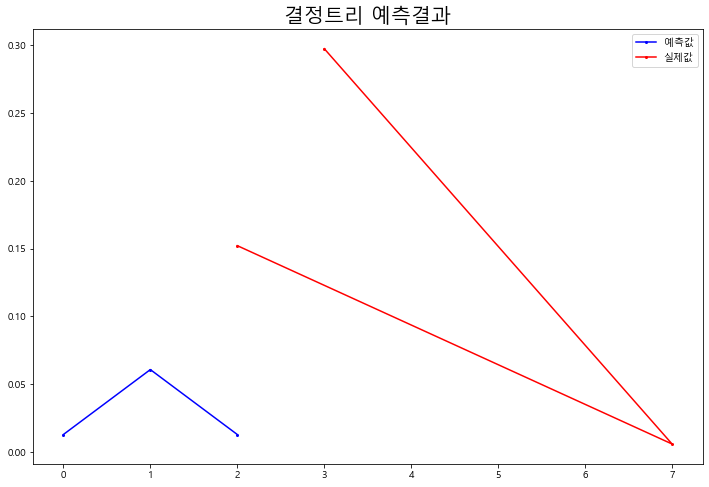

In [151]:
plt.figure(figsize=(12,8))
plt.plot(pred, 'bo-', markersize=2, label='예측값')
plt.plot(actual, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('결정트리 예측결과', size=20)
plt.show()

# Random Forest Regression

In [152]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

In [153]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [154]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [155]:
print(grid.best_score_)
print(grid.best_params_)

-197.9023711872647
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}


In [156]:
rf_1= RandomForestRegressor(n_estimators=10, max_depth=8, min_samples_leaf=18,
                            min_samples_split=8, random_state=seed)

In [157]:
rf_1.fit(X_train,y_train)

pred = rf_1.predict(X_test)
print(pred)

[0.35610871 0.35610871 0.35610871]


In [158]:
print(r2_score(y_test, pred))

-2.940401508540722


In [159]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

In [160]:
y_predict = pred
y_actual = y_test

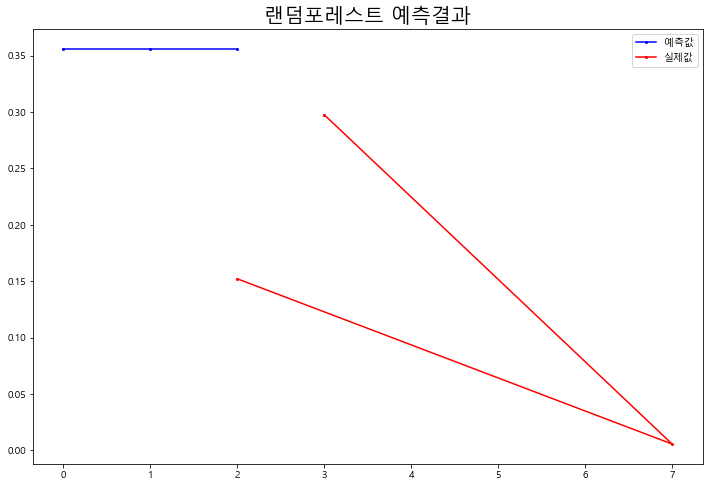

In [161]:
plt.figure(figsize=(12,8))
plt.plot(y_predict, 'bo-', markersize=2, label='예측값')
plt.plot(y_actual, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('랜덤포레스트 예측결과', size=20)
plt.show()